# Spotify Music Popularity Data Analysis
----------------------------------------------------
Perspectives over Computational and Applied Mathematics     
Year 2021/2022

*Rashid Ibrahimli 100457911@alumnos.uc3m.es*

----------------------------------------------------


### Spotify music database

The goal of this problem or dataset is to analyze popularity of the artists and songs depending on various features: acousticness, danceability, energy, duration, instrumentalness, liveness, loudness,sspeechiness and tempo. In this notebook, how features effect popularity level of the musics.

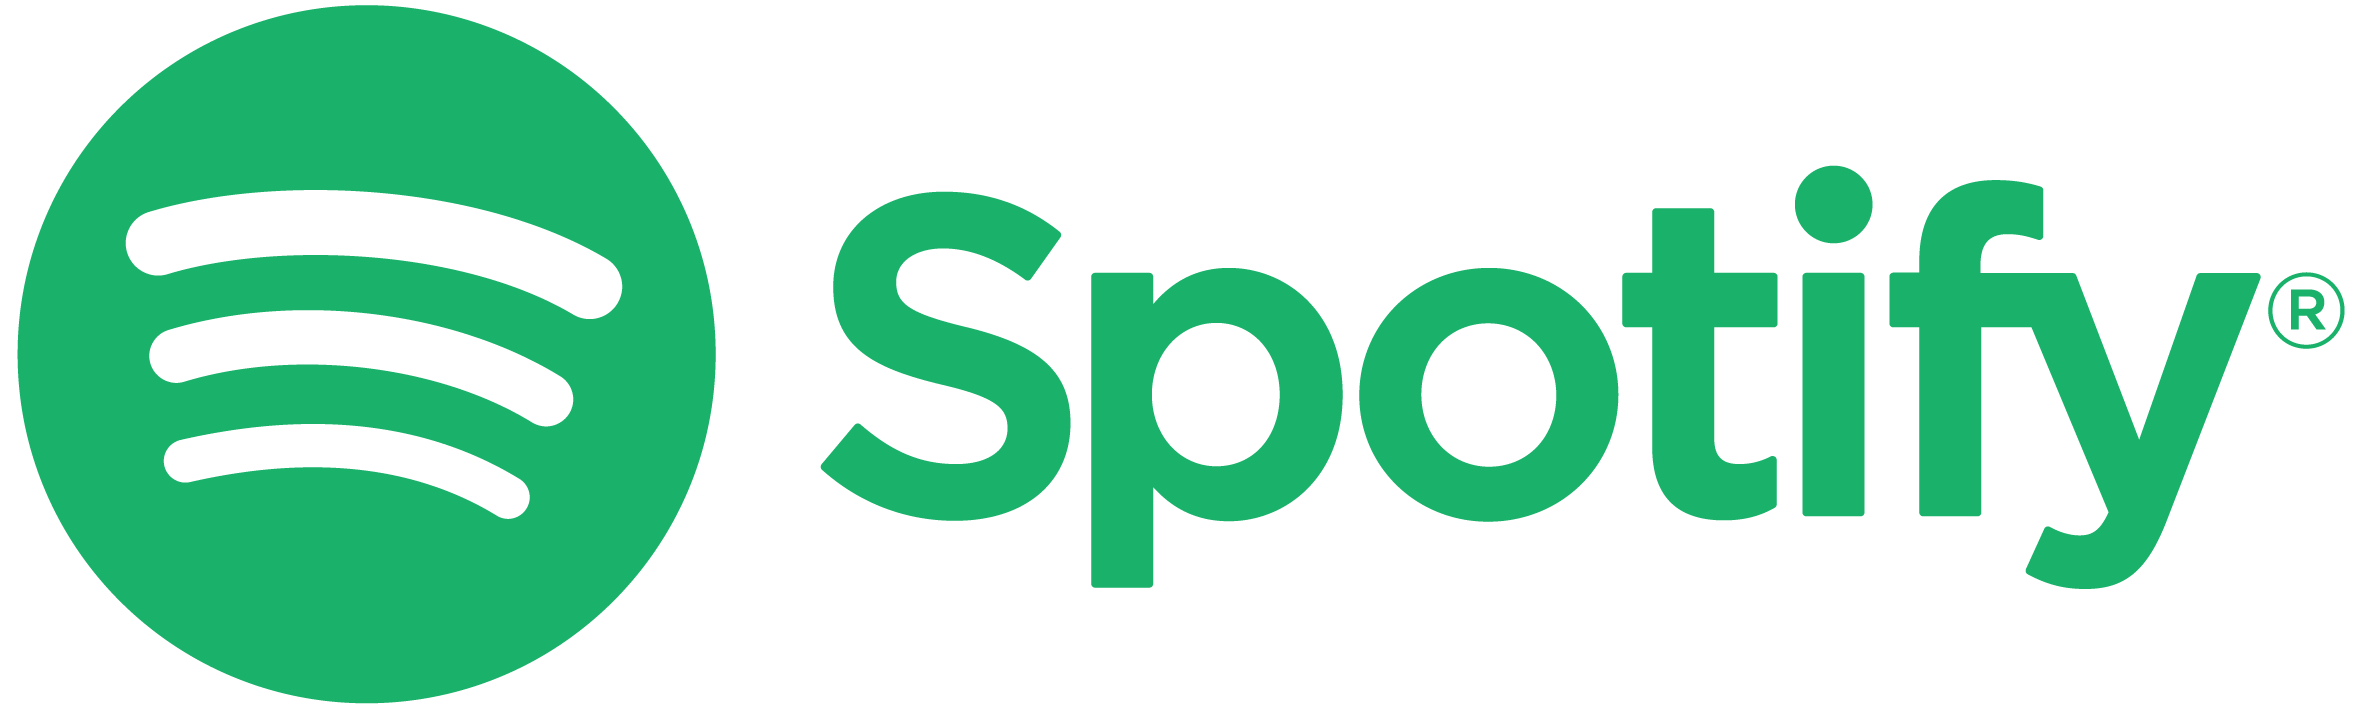

We can load this dataset from the sklearn repository as follows:


## 1. Data Pre-processing
All libraries that will be used throughout the notebook is imported. Data will be imported from google drive. In order to mount the folders in google drive, authorization token that sent to email address should be entered.


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as wg
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data class is created in order to perform pre-processing phase in object-oriented method. __init__ method instantiate the object, import the data from google drive and print first 10 rows. **get_null_data** takes data variable of object and search for a missed values which may affect anaylsis. **drop_NA** method eliminates data with no available rows and return revised data. **data_desc** gives data description such as describe mean, min, max and standart deviation of each variables. **plt_hist** plots top 10 artists with highest number of songs.

In [3]:
class Data():

    def __init__(self,data):
        self.data=data
    def get_data(self,data):
        self.data=data
        string='/content/drive/MyDrive/Colab Notebooks/'+data+'.csv'
        data_ = pd.read_csv(string)
        data_.head(10)
        return data_
   
    def get_null_data(self,data):
      
        #looking for null data in datafarame
        mvalues = data.isnull().sum()       
        #Returning missing values
        return mvalues

    def drop_NA(self,data):
        data=data.dropna()
        return data
      
        print(data.head())
        #Gives data describtion such as describe mean, min, max and standart deviation of each variables.
    def data_desc(self,data):
        print(data.describe())
    def plt_hist(self,data,columns,xlabel,ylabel,title):
          Top10 = pd.DataFrame({'Number':data[columns].value_counts().head(10)})
          Top10.plot.bar(color='brown')
          plt.title('Top 10 artists')
          plt.xlabel(xlabel)
          plt.ylabel(ylabel)
          plt.show()
    
        

**Spotify** object is instantiated and dataframe is printed as an output. Now let's analyze features.

* **valence**: Describes the musical positiveness conveyed by a track
* **year**: Helps to identify popularities for specific year
* **acousticness**: his value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
* **danceability**: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
* **duration_ms**: Represent music length in milli seconds
* **energy**: Describe energy level of the music. Value interval for this feature is between 0 and 1.
* **explicit**: Explicit is boolean variable which indicates whether song contains vulgar words.
* **id**: ID refers to identification number of each songs that stored by Spotify
* **instrumentalness**: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
* **liveness**: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
* **loudness**: It represents loudness level of the music.
* **popularity** (target): Shows popularity level of songs.
* **release_date**: This indicates release year of each song.
* **speechiness**: Speechiness detects the presence of spoken words in a track. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
* **tempo**: It shows tempo level of songs

In [4]:
spotify=Data('data_o')
data=spotify.get_data('data_o')
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
spotify.drop_NA(data)
spotify.data_desc(data)

             valence           year  ...    speechiness          tempo
count  170653.000000  170653.000000  ...  170653.000000  170653.000000
mean        0.528587    1976.787241  ...       0.098393     116.861590
std         0.263171      25.917853  ...       0.162740      30.708533
min         0.000000    1921.000000  ...       0.000000       0.000000
25%         0.317000    1956.000000  ...       0.034900      93.421000
50%         0.540000    1977.000000  ...       0.045000     114.729000
75%         0.747000    1999.000000  ...       0.075600     135.537000
max         1.000000    2020.000000  ...       0.970000     243.507000

[8 rows x 15 columns]


Histogram below represents Top 10 artists with highes number of songs. It can be seen that first two artists have cryllic names which indicates data should be cleaned for the better analysis.

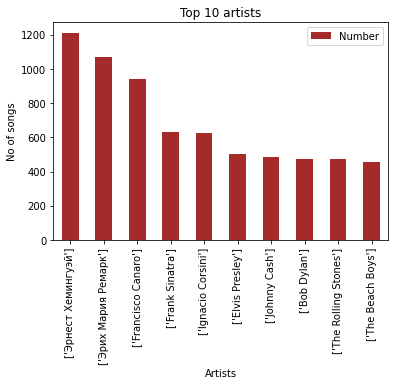

In [6]:
# lets see top10 artists who sang more songs than others
columns='artists'
xlabel='Artists'
ylabel='No of songs'
title='Top 10 artists'
spotify.plt_hist(data,columns,xlabel,ylabel,title)

Code below group artists and popularity columns and sums up popularity level of artists in order to show top 20 popular musicians.

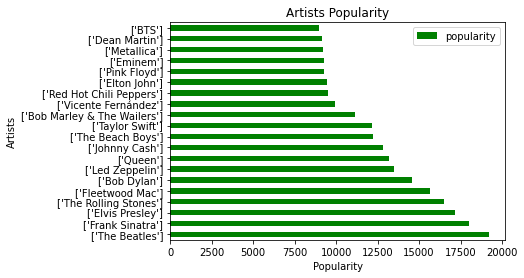

In [7]:
# lets analyze artists whose songs are too popular

Top = data.groupby(['artists'])[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:20]
Top.plot.barh(color='green')
plt.title('Artists Popularity')
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.rcParams["figure.figsize"] = (9,6)

plt.show()

From grapg above, it can be seen that artists name are stored in bracket and quota mark. Beside, some release dates are stored in only as year but others is stored as Y/M/D. Code below eliminates quota mark and bracket from artists name and put release date into Y/M/D format

In [8]:

data['artists'] = data['artists'].apply(lambda x: x[1:-1].replace("'", ''))
data['release_date'] = pd.to_datetime(data['release_date'])


In [76]:
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921-01-01,0.0366,80.954
1,0.9630,1921,0.73200,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921-01-01,0.4150,60.936
2,0.0394,1921,0.96100,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921-01-01,0.0339,110.339
3,0.1650,1921,0.96700,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921-01-01,0.0354,100.109
4,0.2530,1921,0.95700,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921-01-01,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Balvin",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,Ashnikko,0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,MAMAMOO,0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,Eminem,0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


By using lineplot of seaborn library, we can analyze popularity level of Pink Floyd between 1968 and 2000.

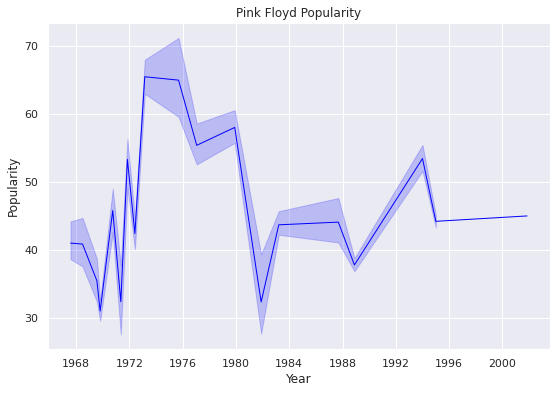

In [9]:
#Below analyzing Pink Floyd popoularity over years

pf = data[data['artists'] == 'Pink Floyd']
sns.set(style='darkgrid')
sns.lineplot(x='release_date', y='popularity',lw = 1, data=pf, color='blue')
# Labels
plt.title("Pink Floyd Popularity")
plt.rcParams["figure.figsize"] = (9,6)

plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

**plt_pop_py** groups features such as artists, years and names depending on sum of its popularity level and plotting barplot for years between 2000 and 2020. By using widget interact method, popularity of of Top 20 songs each years can be observed.

In [25]:
Topperyear = data.groupby(['artists','name','year'])[['popularity']].sum().sort_values(by=['year'], ascending=False).reset_index()
a=Topperyear.groupby(['name'])['popularity','year'].max().sort_values(by=['popularity'],ascending=False)
b =  a[a['year']==2020].reset_index()
def plt_pop_py(years):
  years=2000+years
  b =  a[a['year']==years].reset_index()

  Top2 = b.groupby(['name'])[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:20]
  Top2.plot.barh(color='green')
  plt.title('Song Popularity year'+' '+str(years))
  plt.rcParams["figure.figsize"] = (9,6)

  plt.xlabel('Popularity')
  plt.ylabel('Song')
  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [133]:
wg.interact(plt_pop_py,years=(0,20,1))
plt.show()

interactive(children=(IntSlider(value=10, description='years', max=20), Output()), _dom_classes=('widget-inter…

Graphs below analyzing music features versus Top 20 songs from 2020.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


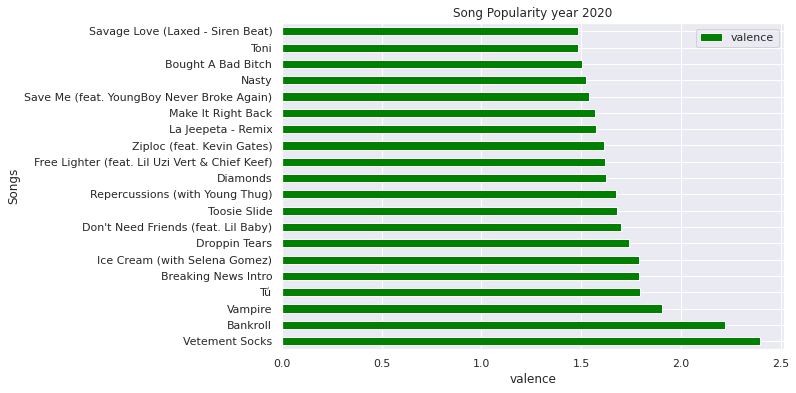

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


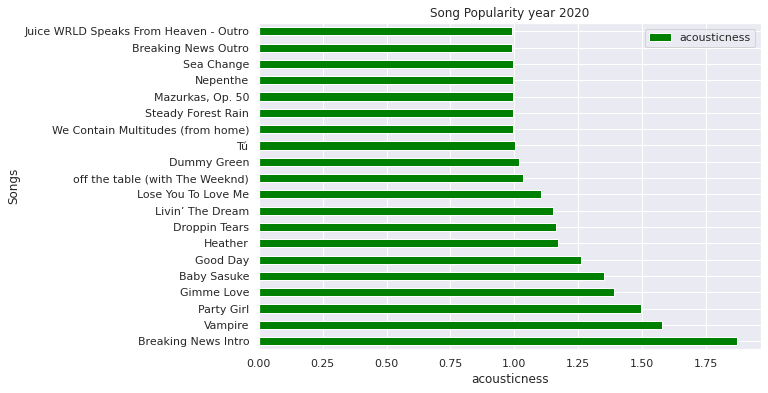

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


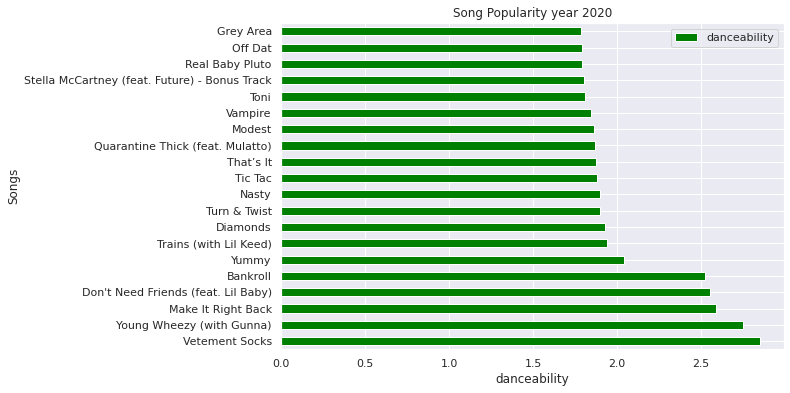

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


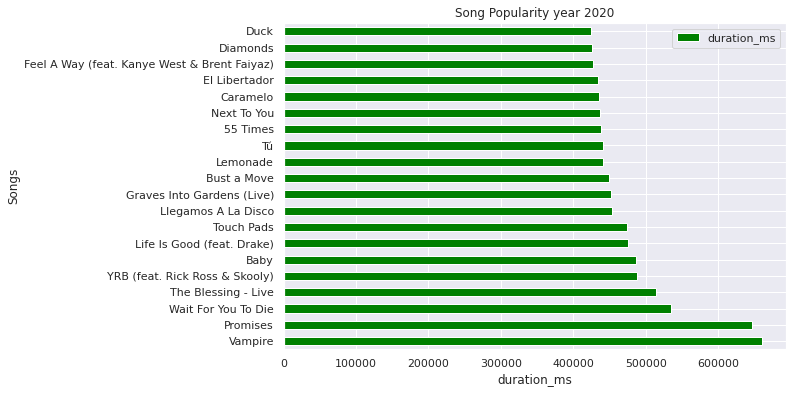

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


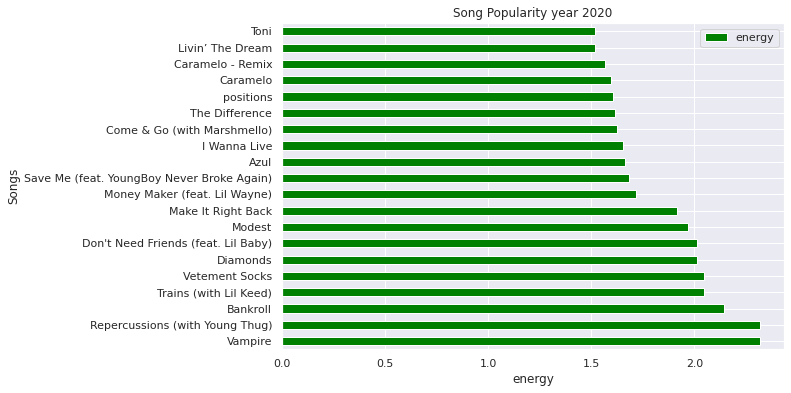

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


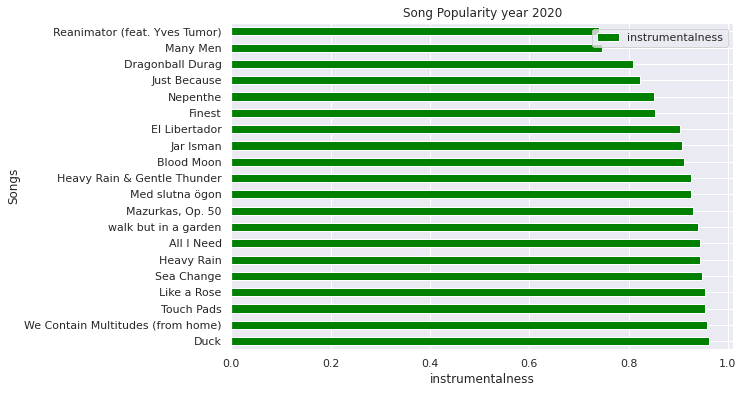

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


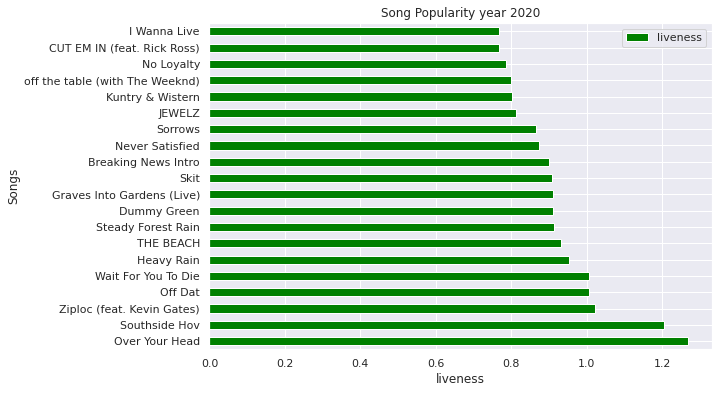

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


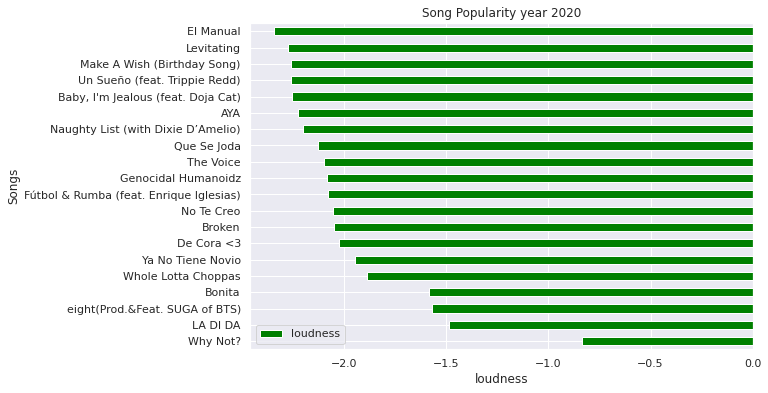

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


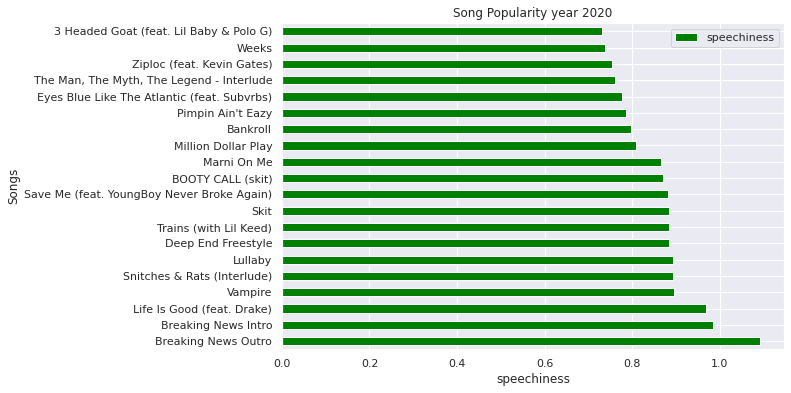

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


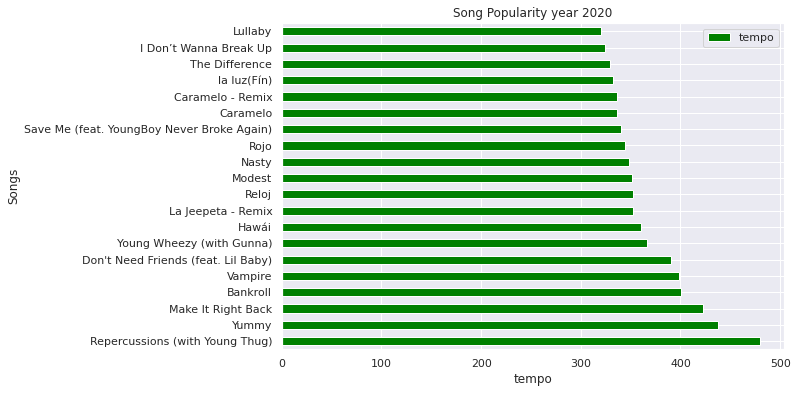

In [27]:
features=['valence','acousticness',	'danceability',	'duration_ms',	'energy',	'instrumentalness','liveness','loudness','speechiness','tempo']
for i in range(len(features)):
  Topperyear = data.groupby(['artists','name','year',features[i]])[['popularity']].sum().sort_values(by=['year'], ascending=False).reset_index()
  a=Topperyear.groupby(['name',features[i]])['popularity','year'].max().sort_values(by=[features[i]],ascending=False)
  b =  a[a['year']==2020].reset_index()

  Top2 = b.groupby(['name'])[[features[i]]].sum().sort_values(by=[features[i]], ascending=False)[:20]
  Top2.plot.barh(color='green')
  plt.title('Song Popularity year 2020')
  plt.rcParams["figure.figsize"] = (9,6)

  plt.xlabel(features[i])
  plt.ylabel('Songs')
  plt.show()


Now, let's analyze how the music features has been changed through the years. 
For this purpose we can use lineplot of seaborn library.

To see the relationship between music features and years, lineplot from seaborn library can be used. It will help visualize categorical relationship. As a first step, unnecessary features are dropped and adjusted dataframe is copied to auxillary dataset. Then, by using sns.lineplot, features is plotted against the year.

Now, we can see clear changes in music features clearly year-by-year.


**valence** which indicate positiveness level has lots of up's and down's between 1920-2020. However, it can been seen that there is slight decrease starting from 1960s until recent years.

**duration_ms** Starting from the 1970s, duration is decreasing.

**liveness** Trends show that liveness is gradually decreasing starting from 1970s.

**loudness** There is high increase in level of loudness as years come through 2000s.

**energy** Like loudness, energy level has also increased throughout years.

**explicit** Between 1960 and 1980, there is almost no explicit contents in the music. However, starting from 1980s, number of explicit contents starts increasing.

**speechiness** There is obvious decrease in speachiness starting from 1960s.

**acousticness** Acoustic levels shows decrease through the years

**danceability** It is obvious that like energy level, danceability of the musics has high increase

**instrumentalness** Instrumentalness levels shows decrease through the years

**tempo** Tempo level has gradually increased 1940s. 




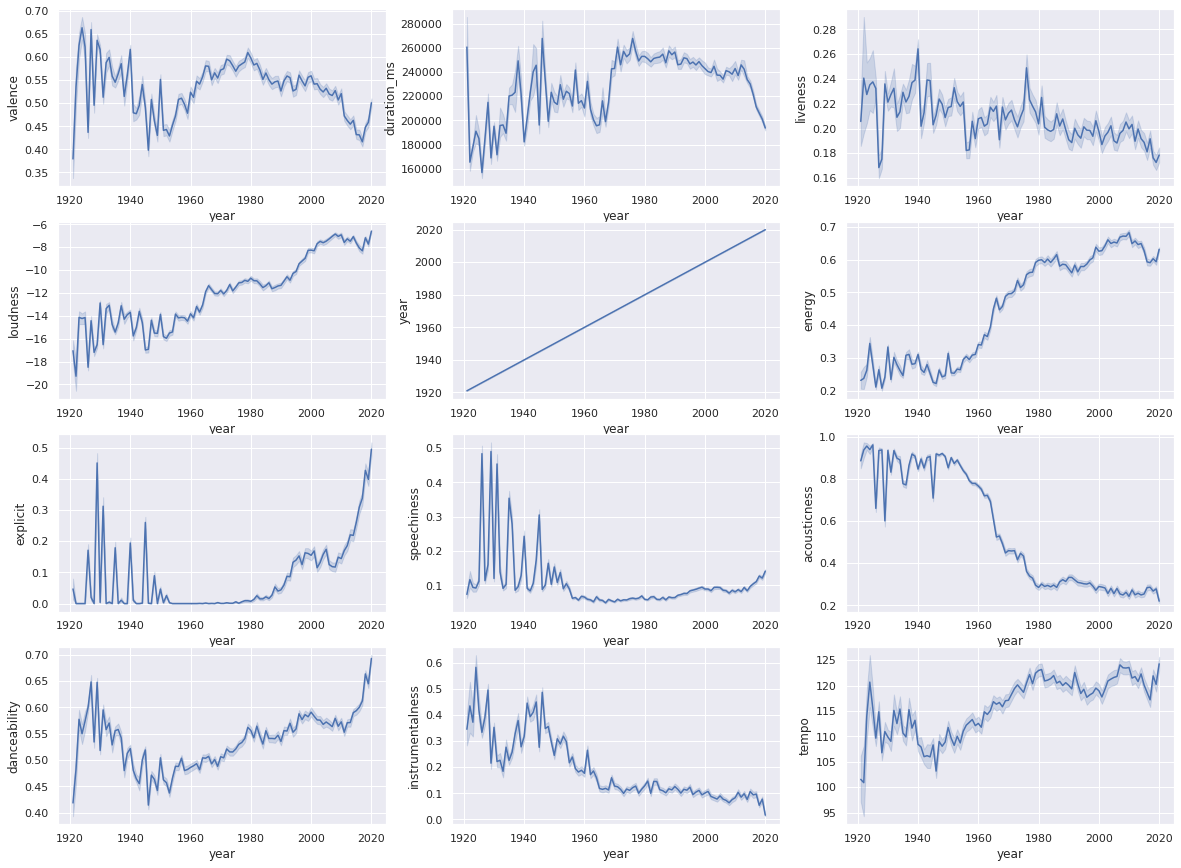

In [13]:
data_aux=data.drop(['artists', 'id',  'key','mode', 'name', 'popularity', 'release_date'],axis=1)
i=0
ii=0
fig, axs = plt.subplots(nrows=4,ncols=3)
fig.set_size_inches(20, 15)
for j in data_aux.columns:
    sns.lineplot(x='year',y=j,data=data_aux,ax=axs[i,ii])
    if i == 3:
        i=0
    else:
        i+=1
    if ii == 2:
        ii=0
    else:
        ii+=1
        

## 2. Modelling
In this section, models will be generated to predict popularity depending on various features discusses above. 2 models will be used:KNN method and Linear Regression. 

Heatmap below demonstrates correlation among each variables. This might helpful to understan colinearity among independent variables.


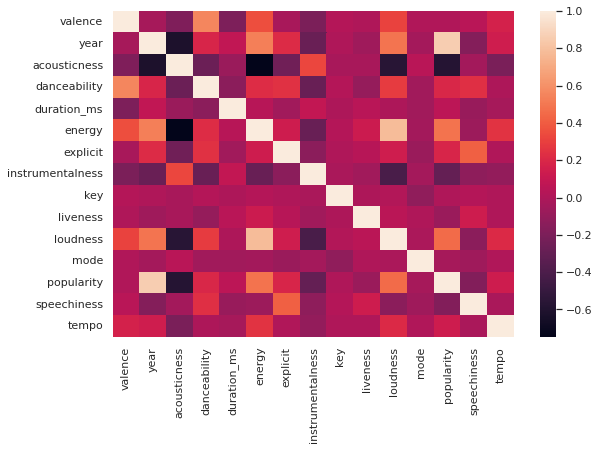

In [113]:
sns.heatmap(data.corr());


In order to see relation between independent variables and target, axis plot was used. Plots below demonstates target as a function of features individually.

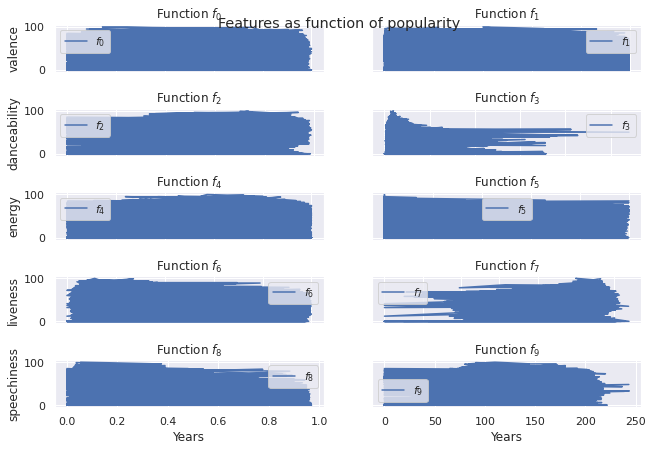

In [123]:

fig, axs = plt.subplots(5,2)

fig.suptitle("Features as function of popularity")
fig.tight_layout() # This line adjusts the spaces between the subfigures to avoid overlapping.

features=['valence','acousticness',	'danceability',	'duration_ms',	'energy',	'instrumentalness','liveness','loudness','speechiness','tempo']


i = 0

for ax in axs.flat: # This will iterate through the six elements of the axs array
    
    ax.plot(data[features[i]].values,data['popularity'].values,)
    ax.set(xlabel = "Years", title = f"Function $f_{i}$", ylabel = features[i])
    ax.legend([f"$f_{i}$"])
    ax.label_outer()
    
    i += 1

plt.show()

Train and test data have to be splitted. For this data, test size is chosen as 20%. Test and train features has been normalized.

In [86]:
df = data.copy(deep=True)
df2=df.drop(['artists','release_date','id','key','name','year','mode'],axis=1)
X=df2.drop('popularity', axis=1).values
Y=df2['popularity'].values
#Split test data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 12345)
#Normalize train and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2.1 KNN method
K-NN is a *non-parametric* method, since there are not parameters to be learned. To estimate the output a new sample $\mathbf{x}^*$, you only have to:
* Select the value of K.
* Search, among the training data, the K nearest neighbours of $\mathbf{x}^*$
* Compute the estimated target  $f(\mathbf{x}^*)$ as the average value of the targets associated to the K-nearest neighbours of $\mathbf{x}^*$. 
That is,

\begin{align}
f(\mathbf{x}^*) =\frac{1}{K}\sum_{k\in \mathcal{S}_{K}(\mathbf{x}^*)} y^{(k)},
\end{align}


Code below generates KNN model by choosing $K$ value between 2 and 10, then it calculate root mean square error of both test and train data in order to analyze optimal value of $K$.



In [107]:

RMSE1_train, RMSE1_test = [], []
  
for i in range(2,10,1):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_train_pred = knn.predict(X_train)
  knn_train_rmse = np.sqrt(mse(y_train, y_train_pred))
  RMSE1_train.append(knn_train_rmse.round(3))
  y_test_pred = knn.predict(X_test)
  knn_test_rmse = np.sqrt(mse(y_test, y_test_pred))
  RMSE1_test.append(knn_test_rmse.round(3))

Graph shows $RMSE$ of train and test samples versus to value of $K$. By using graph below, we can see that, when $K$ is between 2 and 5, model is overfit. From the graph, we can estime that optimal $K$ value is 7.

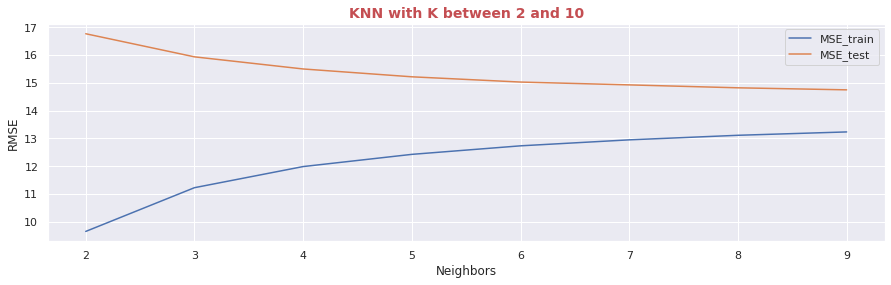

In [108]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(2, 10, 1)
ax = sns.lineplot(x=x, y=RMSE1_train)
sns.lineplot(x=x, y=RMSE1_test, ax=ax)
ax.legend(labels=['MSE_train', 'MSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Neighbors')
ax.set_ylabel('RMSE')
ax.set_xticks(np.arange(2,10,1))
ax.set_title('KNN with K between 2 and 10', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()



We will use this training set to fit a **linear** model defined by:

$$f(\mathbf{x}) =  w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_D x_D, $$

where $w_0$ is called the **intercept**, and it captures the **bias** level of $y$.

This regression model is called **linear regression** since we approximate the target $y$ by a function defined as a linear combination of the input features.

R square value of generated model is around 45% percent which means that model can explain just 45% of the variance in the data. $RMSE$ value is around 16 which is higher than KNN. Therefore, we can conclude that model cannot be interpreted well with linear regression.


In [132]:

lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)
y_pred = lr.predict(X_test)
y_pred_2 = lr.predict(X_train)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Root Mean squared error: %.5f'
      % np.sqrt(mse(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE: %.2f'
      % mean_absolute_error(y_test, y_pred))



Coefficients: 
 [-5.15170501 -8.05312096  3.85898512  0.05816841  2.97153562  2.62622041
 -2.68827118 -1.41819444  1.33706147 -5.58593837  0.70598708]
Root Mean squared error: 16.16416
Coefficient of determination: 0.45
MAE: 13.04


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


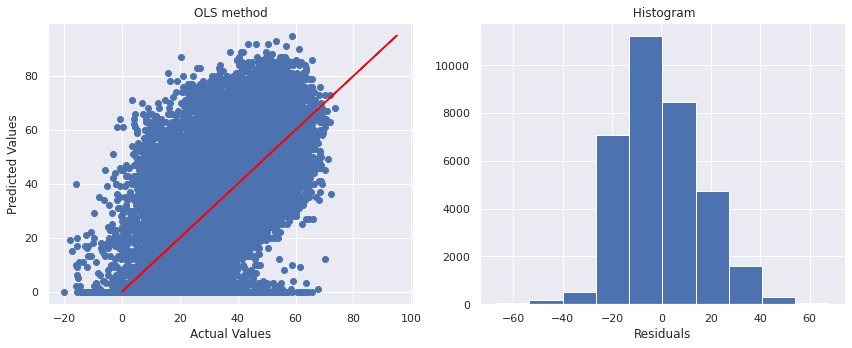

In [112]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.title("OLS method")

plt.plot(y_test, y_test, color="red")
plt.scatter(y_pred,y_test)
plt.subplot(1,2,2)
Residuals=y_test-y_pred
plt.subplot(1,2,2)
plt.hist(Residuals)
plt.xlabel("Residuals")
plt.title(" Histogram")

plt.tight_layout()
plt.show()



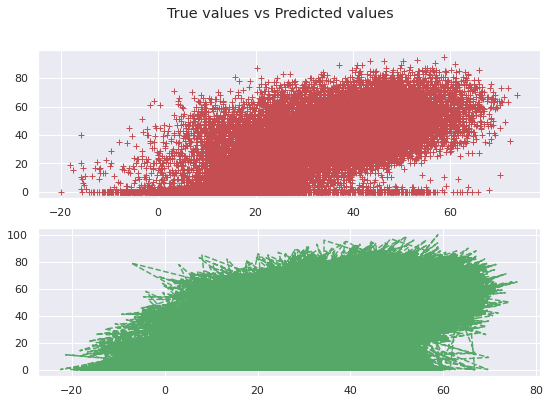

In [122]:
fig, axs = plt.subplots(2)
fig.suptitle('True values vs Predicted values')
axs[0].plot(y_pred,y_test, "r+")
axs[1].plot(y_pred_2,y_train,"g--")


plt.show()

### 3. Suggestions

In order to generate more precise model that predict popularity, further pre-processing of data should be performed. This include further cleaning processes of the data, finding outliers in each features, joining other features such as genres in order to increase the correlation. Other pre-processing, different modelling methods can also be used such as Random forest, Polynomial Regression, Decision Tree and so on.